### **Importações**

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df_treino = pd.read_csv("Teste.csv")
df_treino.head()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,-1,-1,1,0,1,-1,1,1,0,1
1,1,-1,0,-1,1,-1,0,1,1,1
2,-1,-1,1,0,1,1,1,-1,0,1
3,1,-1,0,1,1,0,1,-1,-1,1
4,1,0,1,-1,1,0,-1,-1,1,1


In [3]:
# Importação dos dataset de validacao e teste
file_path = r'Validacao.csv'
df_validacao = pd.read_csv(file_path)
df_validacao = df_validacao.astype(int)
display(df_validacao.head())

file_path = r'Teste.csv'
df_teste = pd.read_csv(file_path)
df_teste = df_teste.astype(int)
display(df_teste.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,0,0,1,-1,0,1,-1,0,1
1,1,1,1,-1,0,1,-1,-1,0,1
2,1,-1,0,-1,1,0,1,-1,1,1
3,-1,1,-1,-1,1,1,0,1,0,1
4,1,0,-1,-1,0,-1,1,1,1,1


,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,-1,-1,1,0,1,-1,1,1,0,1
1,1,-1,0,-1,1,-1,0,1,1,1
2,-1,-1,1,0,1,1,1,-1,0,1
3,1,-1,0,1,1,0,1,-1,-1,1
4,1,0,1,-1,1,0,-1,-1,1,1


#### **Treino**

In [4]:
# Filtrando as features que serão passadas para predição
X = df_treino.drop(columns=['Resultado'])
X

,J1,J2,J3,J4,J5,J6,J7,J8,J9
0,-1,-1,1,0,1,-1,1,1,0
1,1,-1,0,-1,1,-1,0,1,1
2,-1,-1,1,0,1,1,1,-1,0
3,1,-1,0,1,1,0,1,-1,-1
4,1,0,1,-1,1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...
121,-1,1,1,1,-1,-1,1,0,0
122,0,1,0,1,0,0,0,-1,0
123,0,0,1,0,0,0,0,-1,1
124,0,-1,0,1,0,-1,0,1,1


In [5]:
# Obtendo as labels do dataset de treino
Y = df_treino.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [6]:
# Criação do Classificador
clf = tree.DecisionTreeClassifier()

# Treino do algoritmo
clf.fit(X.values,Y)

DecisionTreeClassifier()

[Text(0.47875, 0.9375, 'x[0] <= -0.5\ngini = 0.695\nsamples = 126\nvalue = [40, 40, 40, 6]'),
 Text(0.2275, 0.8125, 'x[4] <= 0.5\ngini = 0.626\nsamples = 54\nvalue = [29, 11, 11, 3]'),
 Text(0.08, 0.6875, 'x[8] <= -0.5\ngini = 0.408\nsamples = 28\nvalue = [20, 8, 0, 0]'),
 Text(0.06, 0.5625, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.1, 0.5625, 'x[1] <= -0.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8, 0, 0]'),
 Text(0.06, 0.4375, 'x[8] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0, 0]'),
 Text(0.04, 0.3125, 'x[2] <= -0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0, 0]'),
 Text(0.02, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.06, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.08, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(0.14, 0.4375, 'x[3] <= -0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7, 0, 0]'),
 Text(0.12, 0.3125, 'x[6] <= -0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0, 0]'),
 Text(0.1, 0.1875,

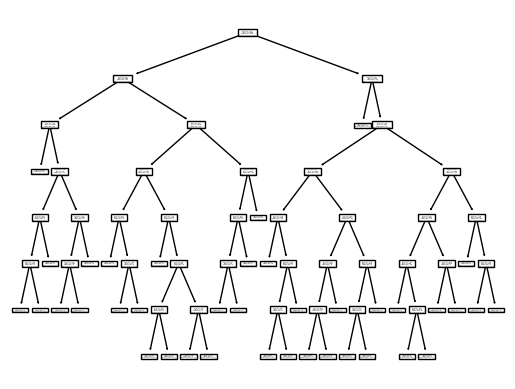

In [7]:
# Plotando a árvore de decisão
tree.plot_tree(clf)

In [ ]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X)

# Calculando a acurácia
acuracia = accuracy_score(Y, predicao)
print("Acurácia: {:.2f}".format(acuracia))

#### **Validação**

In [9]:
# Filtrando as features que serão passadas para predição
X_valid = df_validacao.drop(columns=['Resultado'])
X_valid = X_valid.values
X_valid

array([[ 1,  0,  0, ...,  1, -1,  0],
       [ 1,  1,  1, ..., -1, -1,  0],
       [ 1, -1,  0, ...,  1, -1,  1],
       ...,
       [ 1,  0, -1, ...,  0,  1,  0],
       [ 0, -1,  0, ...,  1,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [10]:
# Obtendo as labels do dataset de validação
Y_valid = df_validacao.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_valid

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [11]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_valid)

# Calcular a acurácia
acuracia = accuracy_score(Y_valid, predicao)
print("Acurácia: {:.2f}".format(acuracia))

Acurácia: 0.62


#### **Teste**

In [13]:
# Filtrando as features que serão passadas para predição
X_test = df_teste.drop(columns=['Resultado'])
X_test = X_test.values
X_test

array([[-1, -1,  1, ...,  1,  1,  0],
       [ 1, -1,  0, ...,  0,  1,  1],
       [-1, -1,  1, ...,  1, -1,  0],
       ...,
       [ 0,  0,  1, ...,  0, -1,  1],
       [ 0, -1,  0, ...,  0,  1,  1],
       [ 1,  0,  0, ...,  0, -1,  0]])

In [14]:
# Obtendo as labels do dataset de teste
Y_test = df_teste.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [15]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(Y_test, predicao)
print("Acurácia: {:.2f}".format(acuracia))

Acurácia: 1.00


In [16]:
# Nomes das classes
nomes_classes = ["O ganhou","Empate","X ganhou","Ainda tem jogo"]

# Calcular e imprimir o relatório de classificação
relatorio_classificacao = classification_report(Y_test, predicao, target_names=nomes_classes)
print("Relatório de Classificação:\n", relatorio_classificacao)

Relatório de Classificação:
                 precision    recall  f1-score   support

      O ganhou       1.00      1.00      1.00        40
        Empate       1.00      1.00      1.00        40
      X ganhou       1.00      1.00      1.00        40
Ainda tem jogo       1.00      1.00      1.00         6

      accuracy                           1.00       126
     macro avg       1.00      1.00      1.00       126
  weighted avg       1.00      1.00      1.00       126

